# Maintenance Runners

In [1]:
%whos

Interactive namespace is empty.


In [ ]:
%reset
# Talk_ID == 2113 (Ghana)

In [ ]:
pd.set_option('max_colwidth',2000)
# pd.reset_option('max_colwidth')
df.text[df.tag == 'entertainment'].sample(20)

#df_filtered.text.sample(10)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
# nltk.download('wordnet')
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

#### Imports

In [1]:
'''
1. (Whiteboard- Structure) → Modularize
2. Clean + Comment + Tighten
3. Peruse remaining code → Add anything valuable, trash the remaining
4. resume NLP courses → extensions
___________________________________________________________________
- separate modules
- mind the sentiment analysis portion (for extensions)
'''

'\n1. (Whiteboard- Structure) → Modularize\n2. Clean + Comment + Tighten\n3. Peruse remaining code → Add anything valuable, trash the remaining\n4. resume NLP courses → extensions\n___________________________________________________________________\n- separate modules\n- mind the sentiment analysis portion (for extensions)\n'

In [2]:
import numpy as np
import pandas as pd
import math
import pickle
import string
import unicodedata
from collections import Counter

import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from textblob import TextBlob
import streamlit as st
import time
import gensim
import matplotlib.pyplot as plt
from selenium import webdriver

In [ ]:
np.random.seed(0)

In [1]:
import re
from tqdm import tqdm
# tqdm.pandas()
import spacy
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim import matutils, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import scipy.sparse
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.manifold import TSNE
from wordcloud import WordCloud

In [6]:
for i in tqdm(range(10000)):
    print(i, end=' ')

 15%|█▍        | 1455/10000 [00:00<00:00, 10007.30it/s]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

 34%|███▍      | 3450/10000 [00:00<00:00, 9527.02it/s] 

 2189 2190 2191 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201 2202 2203 2204 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331 2332 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370 2371 2372 2373 2374 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384 2385 2386 2387 2388

 54%|█████▍    | 5446/10000 [00:00<00:00, 9015.68it/s]

4448 4449 4450 4451 4452 4453 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478 4479 4480 4481 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506 4507 4508 4509 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536 4537 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548 4549 4550 4551 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562 4563 4564 4565 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576 4577 4578 4579 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590 4591 4592 4593 4594 4595 4596 4597 4598 4599 4600 4601 4602 4603 4604 4605 4606 4607 4608 4609 4610 4611 4612 4613 4614 4615 4616 4617 4618 4619 4620 4621 4622 4623 4624 4625 4626 4627 4628 4629 4630 4631 4632 4633 4634 4635 4636 4637 4638 4639 4640 4641 4642 4643 4644 4645 4646 4647 

 83%|████████▎ | 8299/10000 [00:00<00:00, 7159.71it/s]

 6444 6445 6446 6447 6448 6449 6450 6451 6452 6453 6454 6455 6456 6457 6458 6459 6460 6461 6462 6463 6464 6465 6466 6467 6468 6469 6470 6471 6472 6473 6474 6475 6476 6477 6478 6479 6480 6481 6482 6483 6484 6485 6486 6487 6488 6489 6490 6491 6492 6493 6494 6495 6496 6497 6498 6499 6500 6501 6502 6503 6504 6505 6506 6507 6508 6509 6510 6511 6512 6513 6514 6515 6516 6517 6518 6519 6520 6521 6522 6523 6524 6525 6526 6527 6528 6529 6530 6531 6532 6533 6534 6535 6536 6537 6538 6539 6540 6541 6542 6543 6544 6545 6546 6547 6548 6549 6550 6551 6552 6553 6554 6555 6556 6557 6558 6559 6560 6561 6562 6563 6564 6565 6566 6567 6568 6569 6570 6571 6572 6573 6574 6575 6576 6577 6578 6579 6580 6581 6582 6583 6584 6585 6586 6587 6588 6589 6590 6591 6592 6593 6594 6595 6596 6597 6598 6599 6600 6601 6602 6603 6604 6605 6606 6607 6608 6609 6610 6611 6612 6613 6614 6615 6616 6617 6618 6619 6620 6621 6622 6623 6624 6625 6626 6627 6628 6629 6630 6631 6632 6633 6634 6635 6636 6637 6638 6639 6640 6641 6642 6643

100%|██████████| 10000/10000 [00:01<00:00, 8426.81it/s]

8299 8300 8301 8302 8303 8304 8305 8306 8307 8308 8309 8310 8311 8312 8313 8314 8315 8316 8317 8318 8319 8320 8321 8322 8323 8324 8325 8326 8327 8328 8329 8330 8331 8332 8333 8334 8335 8336 8337 8338 8339 8340 8341 8342 8343 8344 8345 8346 8347 8348 8349 8350 8351 8352 8353 8354 8355 8356 8357 8358 8359 8360 8361 8362 8363 8364 8365 8366 8367 8368 8369 8370 8371 8372 8373 8374 8375 8376 8377 8378 8379 8380 8381 8382 8383 8384 8385 8386 8387 8388 8389 8390 8391 8392 8393 8394 8395 8396 8397 8398 8399 8400 8401 8402 8403 8404 8405 8406 8407 8408 8409 8410 8411 8412 8413 8414 8415 8416 8417 8418 8419 8420 8421 8422 8423 8424 8425 8426 8427 8428 8429 8430 8431 8432 8433 8434 8435 8436 8437 8438 8439 8440 8441 8442 8443 8444 8445 8446 8447 8448 8449 8450 8451 8452 8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 

# Preliminary Pre-pre-processing

In [ ]:
df1 = pd.read_csv("data/Release_v0/TEDonly_speakers_final.csv")

In [ ]:
df1.speaker1_profile.value_counts().sort_index()

In [ ]:
# df1.sample(15)
# df1.describe()
# df1.info()
df1.columns

In [ ]:
df1b = pd.read_csv("data/Release_v0/TEDonly_final.csv")
df2b = pd.read_csv("data/Release_v0/TEDplus_final.csv")

In [ ]:
print(len(df1b.columns), df1b.columns, ' --- \n', len(df2b.columns), df2b.columns)

In [ ]:
df2 = pd.read_csv("data/Release_v0/TEDplus_speakers_final.csv")

In [ ]:
# df2.sample(15)
# df2.describe()
# df2.info()
# df2.columns

# confirm the two files have identical columns
for c in range(len(df1.columns)):
    print(c, df1.columns[c] == df2.columns[c])

In [ ]:
print(len(df1), len(df2), len(df1)+len(df2))
print(df1.index, df2.index)

In [ ]:
print(len(df2))
df2.index

In [ ]:
df = pd.concat([df1,df2])

In [ ]:
print(len(df), len(df.columns), df.shape)

In [ ]:
df.index

In [ ]:
# check for duplicate Talk_ID's
duplicateRowsDF = df[df.duplicated(['Talk_ID'], keep=False)]
duplicateRowsDF

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.sample(20)

In [ ]:
# Save & Store File (Pickle)

# filename = "raw1"
# outfile = open(filename, 'wb')
# pickle.dump(df, outfile)
# outfile.close()

In [58]:
# Retrieve File (Un-pickle)
filename = 'raw1'
infile = open(filename,'rb')
new_file = pickle.load(infile)
infile.close()

In [59]:
df = new_file

In [60]:
pd.reset_option('max_colwidth')
df.head()

,public_url,headline,description,event,duration,published,tags,views,text,speaker_1,...,speaker2_introduction,speaker2_profile,speaker_3,speaker3_occupation,speaker3_introduction,speaker3_profile,speaker_4,speaker4_occupation,speaker4_introduction,speaker4_profile
Talk_ID,,,,,,,,,,,,,,,,,,,,,
1,https://www.ted.com/talks/al_gore_on_averting_...,Averting the climate crisis,With the same humor and humanity he exuded in ...,TED2006,0:16:17,6/27/06,"alternative energy,cars,global issues,climate ...",3266733,"Thank you so much, Chris. And it's truly a g...",Al Gore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,https://www.ted.com/talks/david_pogue_says_sim...,Simplicity sells,New York Times columnist David Pogue takes aim...,TED2006,0:21:26,6/27/06,"simplicity,entertainment,interface design,soft...",1702201,"(Music: ""The Sound of Silence,"" Simon & Garf...",David Pogue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,https://www.ted.com/talks/majora_carter_s_tale...,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",TED2006,0:18:36,6/27/06,"MacArthur grant,cities,green,activism,politics...",2000421,If you're here today — and I'm very happy th...,Majora Carter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,https://www.ted.com/talks/ken_robinson_says_sc...,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,TED2006,0:19:24,6/27/06,"children,teaching,creativity,parenting,culture...",51614087,Good morning. How are you? (Laughter) ...,Ken Robinson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,https://www.ted.com/talks/hans_rosling_shows_t...,The best stats you've ever seen,You've never seen data presented like this. Wi...,TED2006,0:19:50,6/27/06,"demo,Asia,global issues,visualizations,global ...",12662135,"About 10 years ago, I took on the task to te...",Hans Rosling,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-process

In [61]:
# create new column with character-length of each speech
df['speech_length'] = df['text'].apply(len)
# create new column to flag whether speech is over or under 1M views
df['reached_threshold'] = np.where(df['views']>=1250000, 1, 0)
# create new column to flag whether tags column contains (any of my) preferred list of tags
# social change, society, global issues, humanity, community, future
df['prefers'] = np.where(df['tags'].str.contains('global')|df['tags'].str.contains('soci')|df['tags'].str.contains('nity')
                         |df['tags'].str.contains('activism')|df['tags'].str.contains('future')|df['tags'].str.contains('health'), 1, 0)
# concatenate text from several columns to include it in speech text
cols = ['headline', 'tags', 'description', 'text']
df['text'] = df[cols].apply(lambda x: ' '.join(x), axis = 1)

In [57]:
# df.dtypes
# print(len(df))
# df.isnull().sum()
pd.reset_option('max_colwidth')
#df.sample(16)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 1 to 12202
Data columns (total 28 columns):
public_url               1747 non-null object
headline                 1747 non-null object
description              1747 non-null object
event                    1747 non-null object
duration                 1747 non-null object
published                1747 non-null object
tags                     1747 non-null object
views                    1747 non-null int64
text                     1747 non-null object
speaker_1                1747 non-null object
speaker1_occupation      1746 non-null object
speaker1_introduction    1746 non-null object
speaker1_profile         1747 non-null object
speaker_2                49 non-null object
speaker2_occupation      50 non-null object
speaker2_introduction    50 non-null object
speaker2_profile         50 non-null object
speaker_3                2 non-null object
speaker3_occupation      2 non-null object
speaker3_introduction    2 non-nu

In [62]:
# check the difference
print(df.shape, df.columns)

(1747, 28) Index(['public_url', 'headline', 'description', 'event', 'duration',
       'published', 'tags', 'views', 'text', 'speaker_1',
       'speaker1_occupation', 'speaker1_introduction', 'speaker1_profile',
       'speaker_2', 'speaker2_occupation', 'speaker2_introduction',
       'speaker2_profile', 'speaker_3', 'speaker3_occupation',
       'speaker3_introduction', 'speaker3_profile', 'speaker_4',
       'speaker4_occupation', 'speaker4_introduction', 'speaker4_profile',
       'speech_length', 'reached_threshold', 'prefers'],
      dtype='object')


In [63]:
df.prefers.value_counts()

0    876
1    871
Name: prefers, dtype: int64

In [64]:
# drop any rows in which 'tags' column contains these words
to_drop = ['performance', 'music', 'magic']
nomusic_df = df[~df['tags'].str.contains('|'.join(to_drop))]

In [53]:
# check the difference
print(nomusic_df.shape, nomusic_df.columns)

(1592, 28) Index(['public_url', 'headline', 'description', 'event', 'duration',
       'published', 'tags', 'views', 'text', 'speaker_1',
       'speaker1_occupation', 'speaker1_introduction', 'speaker1_profile',
       'speaker_2', 'speaker2_occupation', 'speaker2_introduction',
       'speaker2_profile', 'speaker_3', 'speaker3_occupation',
       'speaker3_introduction', 'speaker3_profile', 'speaker_4',
       'speaker4_occupation', 'speaker4_introduction', 'speaker4_profile',
       'speech_length', 'reached_threshold', 'prefers'],
      dtype='object')


In [30]:
#pd.reset_option('max_colwidth')
pd.set_option('max_colwidth',2000)
nomusic_df.sort_values(by=['speech_length']).text

Talk_ID
1464                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [65]:
# Missed one: Delete row with index/Talk_ID of 1464 
nomusic_df = nomusic_df.drop(1464)

In [32]:
df.event.value_counts().sort_index()

TED Senior Fellows at TEDGlobal 2010     1
TED1984                                  1
TED1990                                  1
TED1994                                  1
TED1998                                  6
TED2001                                  3
TED2002                                 28
TED2003                                 34
TED2004                                 31
TED2005                                 36
TED2006                                 43
TED2007                                 68
TED2008                                 56
TED2009                                 81
TED2010                                 68
TED2011                                 70
TED2012                                 65
TED2013                                 76
TED2014                                 84
TED2015                                 75
TED2016                                 75
TED2017                                 90
TEDActive 2011                           3
TEDActive 2

In [33]:
# speeches = df[['text']]
# speeches.sample(10)

In [35]:
print(nomusic_df.index, nomusic_df.shape, nomusic_df.columns)

Int64Index([    1,    53,    66,    92,    96,    49,    71,    94,    54,
               55,
            ...
            11089, 11486, 10274, 12354, 11997, 11337, 12302, 12060, 13062,
            12202],
           dtype='int64', name='Talk_ID', length=1591) (1591, 28) Index(['public_url', 'headline', 'description', 'event', 'duration',
       'published', 'tags', 'views', 'text', 'speaker_1',
       'speaker1_occupation', 'speaker1_introduction', 'speaker1_profile',
       'speaker_2', 'speaker2_occupation', 'speaker2_introduction',
       'speaker2_profile', 'speaker_3', 'speaker3_occupation',
       'speaker3_introduction', 'speaker3_profile', 'speaker_4',
       'speaker4_occupation', 'speaker4_introduction', 'speaker4_profile',
       'speech_length', 'reached_threshold', 'prefers'],
      dtype='object')


In [66]:
nomusic_df.prefers.value_counts()

1    831
0    760
Name: prefers, dtype: int64

In [67]:
nomusic_df.groupby("reached_threshold")["reached_threshold"].count()

reached_threshold
0    814
1    777
Name: reached_threshold, dtype: int64

In [ ]:
df.tags.head(20)

In [ ]:
df.views.describe()

### Explode the list of tags

In [70]:
# reset index from Talk_ID to generic array
# df.reset_index(inplace=True)
pd.reset_option('max_colwidth')
pre_expl_df = nomusic_df.reset_index()
#pre_expl_df.sample(16)

,Talk_ID,public_url,headline,description,event,duration,published,tags,views,text,...,speaker3_occupation,speaker3_introduction,speaker3_profile,speaker_4,speaker4_occupation,speaker4_introduction,speaker4_profile,speech_length,reached_threshold,prefers
532,1707,https://www.ted.com/talks/skylar_tibbits_the_e...,"The emergence of ""4D printing""",3D printing has grown in sophistication since ...,TED2013,0:08:22,4/4/13,"industrial design,TED Fellows,design,technology",2589209,"The emergence of ""4D printing"" industrial desi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7728,1,0
574,1827,https://www.ted.com/talks/stuart_firestein_the...,The pursuit of ignorance,What does real scientific work look like? As n...,TED2013,0:18:33,9/24/13,"curiosity,humor,teaching,neuroscience,mind,sci...",1901005,"The pursuit of ignorance curiosity,humor,teach...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19730,1,0
678,2239,https://www.ted.com/talks/gary_haugen_the_hidd...,The hidden reason for poverty the world needs ...,Collective compassion has meant an overall dec...,TED2015,0:22:08,4/20/15,"justice system,violence,poverty,inequality",1752160,The hidden reason for poverty the world needs ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17741,1,0
834,2841,https://www.ted.com/talks/tom_gruber_how_ai_ca...,"How AI can enhance our memory, work and social...",How smart can our machines make us? Tom Gruber...,TED2017,0:09:46,8/7/17,"product design,computers,intelligence,AI,techn...",1714549,"How AI can enhance our memory, work and social...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7396,1,0
200,381,https://www.ted.com/talks/kristen_ashburn_s_he...,The face of AIDS in Africa,"In this moving talk, documentary photographer ...",TED2003,0:04:37,10/24/08,"AIDS,global issues,HIV,photography,media,activ...",383842,"The face of AIDS in Africa AIDS,global issues,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2246,0,1
1419,2382,https://www.ted.com/talks/ann_morgan_my_year_r...,My year reading a book from every country in t...,Ann Morgan considered herself well read -- unt...,TEDGlobal>London,0:12:03,11/23/15,"library,literature,goal-setting,books,writing,...",1546290,My year reading a book from every country in t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10282,1,0
407,1112,https://www.ted.com/talks/stanley_mcchrystal,"Listen, learn ... then lead",Four-star general Stanley McChrystal shares wh...,TED2011,0:15:38,4/5/11,"iraq,peace,war,global issues,culture,leadership",2643282,"Listen, learn ... then lead iraq,peace,war,glo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13958,1,1
17,16,https://www.ted.com/talks/helen_fisher_tells_u...,"Why we love, why we cheat",Anthropologist Helen Fisher takes on a tricky ...,TED2006,0:23:27,9/6/06,"evolution,gender,psychology,love,relationships...",9865661,"Why we love, why we cheat evolution,gender,psy...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20655,1,0
109,204,https://www.ted.com/talks/isabel_allende_tells...,Tales of passion,Author and activist Isabel Allende discusses w...,TED2007,0:18:00,1/3/08,"entertainment,South America,world cultures,glo...",4491521,"Tales of passion entertainment,South America,w...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14273,1,1
1059,1062,https://www.ted.com/talks/bruce_feiler_the_cou...,The council of dads,"Diagnosed with cancer, Bruce Feiler worried fi...",TEDMED 2010,0:20:33,1/27/11,"storytelling,cancer,culture,community",478022,"The council of dads storytelling,cancer,cultur...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20962,0,1


In [ ]:
#df['tags']=df['tags'].str.split(',').tolist()

In [ ]:
#df.tags.astype('list')
#df['tags'].sample(20)

In [71]:
# (1) We start with creating a new dataframe from the series with Talk_Id as the index
exploding_df = pd.DataFrame(pre_expl_df.tags.str.split(',').tolist(), index=pre_expl_df.Talk_ID).stack()

In [ ]:
exploding_df.head(20)

In [72]:
# (2) We now want to get rid of the secondary index. To do this, we will make EmployeeId
# as a column (it can't be an index since the values will be duplicate)
exploded_df = exploding_df.reset_index([0, 'Talk_ID'])

# (3) The final step is to set the column names as we want them
exploded_df.columns = ['Talk_ID', 'tag']

In [ ]:
exploded_df.head(20)

In [73]:
# merge original dataframe with this new one
df = pd.merge(df, exploded_df, on='Talk_ID')

In [74]:
# Save & Store File (Pickle)

filename = "exploded2"
outfile = open(filename, 'wb')
pickle.dump(df, outfile)
outfile.close()

In [5]:
# Retrieve File (Un-pickle)
filename = 'exploded2'
infile = open(filename,'rb')
new_file = pickle.load(infile)
infile.close()

In [6]:
df = new_file

In [7]:
### ALL TAGS ###
# df['tag'].value_counts(ascending=True)
df['tag'].value_counts()

technology         510
science            402
global issues      333
culture            319
design             287
business           224
social change      176
society            171
health             153
innovation         144
future             141
art                135
biology            131
humanity           130
creativity         129
TED Fellows        127
entertainment      125
communication      125
medicine           118
activism           118
economics          113
collaboration      112
brain              109
Africa             107
invention          104
community          103
environment        103
health care         94
education           93
politics            88
                  ... 
evil                 2
hearing              2
monkeys              2
Nobel Prize          2
Brand                2
population           2
state-building       2
epidemiology         2
urban                2
science fiction      2
novel                2
funny                2
homelessnes

Text(0, 0.5, '# of Speeches')

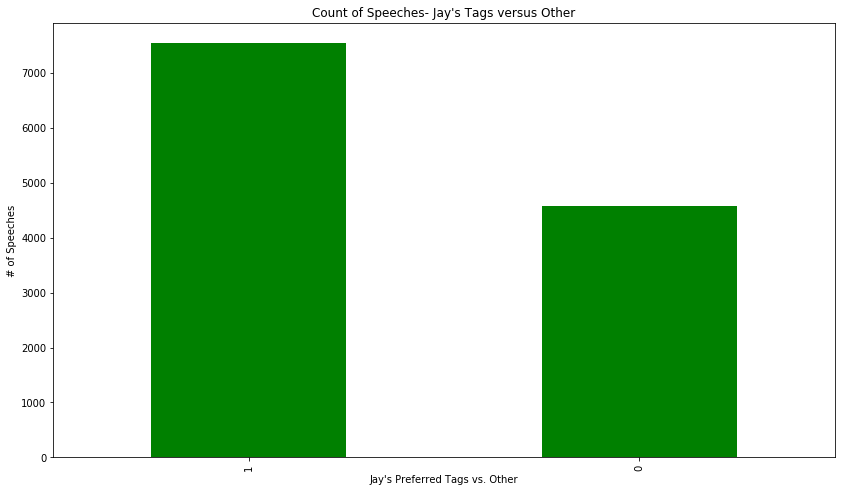

In [23]:
#ax = df.plot.bar(x=df['tag'], y=df['tag'].count(), rot=0)
#ax = df.plot.bar(y=df['tag'].value_counts(), rot=0)
ax = df['prefers'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Speeches- Jay's Tags versus Other", color='green')
ax.set_xlabel("Jay's Preferred Tags vs. Other")
ax.set_ylabel("# of Speeches")

Text(0, 0.5, 'Total Views (Millions)')

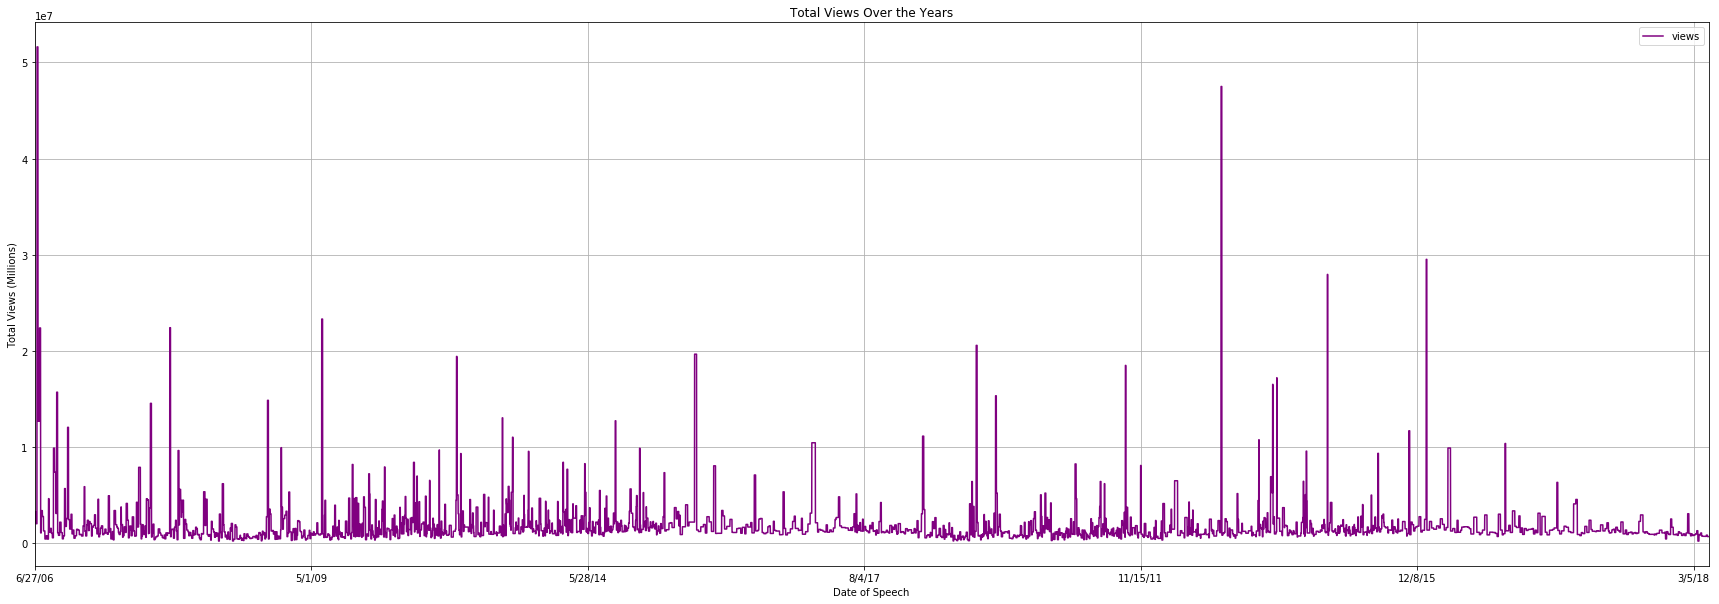

In [44]:
# j_data = {df['published': [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010],
#         'Unemployment_Rate': [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
#        }
plt.rcParams['figure.figsize'] = [30, 10]

ax = df.plot(x ='published', y='views', kind = 'line', color = 'purple', grid=True, title='Total Views Over the Years')
# Set the x-axis label
ax.set_xlabel("Date of Speech")

# Set the y-axis label
ax.set_ylabel("Total Views (Millions)")

In [ ]:
print(len(df.tag.unique()))
df.tag.unique()

In [ ]:
# df.groupby('tag').filter(lambda x: len(x) < 88).sort_values(by=['speech_length'])
# df.groupby('tag').filter(lambda x: len(x) < 88)

In [ ]:
# filter to only tags that are used at least 80 times
# df_filtered = df.groupby('tag').filter(lambda x: len(x) >= 80)

In [ ]:
# print(df_filtered.tag.value_counts())
#len(df_filtered.tag.unique())

In [79]:
# compress df to remove duplicate rows (created from exploding 'tags'), leaving only unique Talk_ID
de_exploded_df = df.drop_duplicates('Talk_ID')

In [80]:
print(de_exploded_df.shape, de_exploded_df.index,'\n', de_exploded_df.columns)

(1591, 30) Int64Index([    0,     9,    18,    25,    36,    44,    49,    57,    65,
               75,
            ...
            12031, 12039, 12044, 12052, 12058, 12066, 12073, 12083, 12092,
            12100],
           dtype='int64', length=1591) 
 Index(['Talk_ID', 'public_url', 'headline', 'description', 'event', 'duration',
       'published', 'tags', 'views', 'text', 'speaker_1',
       'speaker1_occupation', 'speaker1_introduction', 'speaker1_profile',
       'speaker_2', 'speaker2_occupation', 'speaker2_introduction',
       'speaker2_profile', 'speaker_3', 'speaker3_occupation',
       'speaker3_introduction', 'speaker3_profile', 'speaker_4',
       'speaker4_occupation', 'speaker4_introduction', 'speaker4_profile',
       'speech_length', 'reached_threshold', 'prefers', 'tag'],
      dtype='object')


In [ ]:
pd.set_option('max_colwidth',2000)
de_exploded_df.sort_values(by=['speech_length']).text
# de_exploded_df.sample(20)

### Add Pre-processing Approaches

#### Merged both methods

In [68]:
pd.set_option('max_colwidth',2000)
# pd.reset_option('max_colwidth')
# df.text[df.tag == 'entertainment'].sample(20)

#df_filtered.text.sample(10)
df.text.sample(20)

Talk_ID
1632    Excuse me, may I rent your car? transportation,consumerism,women in business,business,collaboration A decade ago, Robin Chase founded Zipcar in the US, now the largest car-sharing company in the world. Now she's exploring the next level of car-sharing: Buzzcar, a French startup that lets people rent their own cars to others. The details are fascinating (how does insurance work, exactly?), and the larger vision (she calls it Peers, Inc.) points to a new definition of ownership and entrepreneurship.   Twelve years ago, I founded Zipcar. Zipcar buys cars and parks them throughout dense metropolitan areas for people to use, by the hour and by the day, instead of owning their own cars. Each Zipcar replaces 15 personal cars, and each driver drives about 80 percent less because they're now paying the full cost, all at once, in real time. But what Zipcar really did was make sharing the norm.    Now, a decade later, it's really time to push the envelope a little bit, and so a co

In [ ]:
pd.reset_option('max_colwidth')
df.sample(8)

In [81]:
# Save & Store File (Pickle)

filename = "de_exploded"
outfile = open(filename, 'wb')
pickle.dump(de_exploded_df, outfile)
outfile.close()

In [82]:
# Retrieve File (Un-pickle)
filename = 'de_exploded'
infile = open(filename,'rb')
new_file = pickle.load(infile)
infile.close()

In [83]:
de_exploded_df = new_file

In [84]:
df = de_exploded_df
#df = new_file

In [ ]:
pd.set_option('max_colwidth',2000)
df['text'].head()

In [85]:
#pd.reset_option('max_colwidth')
pd.set_option('max_colwidth',2000)
df.text[df.Talk_ID == 2113]

9399    The leaders who ruined Africa, and the generation who can fix it TED Fellows,Africa,entrepreneur Before he hit eighteen, Fred Swaniker had lived in Ghana, Gambia, Botswana and Zimbabwe. What he learned from a childhood across Africa was that while good leaders can't make much of a difference in societies with strong institutions, in countries with weak structures, leaders could make or break a country. In a passionate talk the entrepreneur and TED Fellow looks at different generations of African leaders and imagines how to develop the leadership of the future.   I experienced my first coup d'état at the age of four. Because of the coup d'état, my family had to leave my native home of Ghana and move to the Gambia. As luck would have it, six months after we arrived, they too had a military coup. I vividly remember being woken up in the middle of the night and gathering the few belongings we could and walking for about two hours to a safe house. For a week, we slept under our beds

In [86]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

sample = "we'll we're she's don't can't should've"
sample = replace_contractions(sample)
print(sample)

we will we are she is do not can not should have


In [87]:
# AZ
# Apply a first round of text cleaning techniques
def clean_text_round1(text):
    '''Make text lowercase, remove text in parentheses, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    #inserted a contractions expander
    text = contractions.fix(text)
    text = re.sub('\[.*?\]', '', text)
    # further text standardizers, taken from Eman's code
    text = re.sub('@\S+', '', text)
    text = re.sub("@", "at", text)     

    text = re.sub('\b(Chris Anderson:)\b', '', text)
    text = re.sub('\b(\(applause\)|\(laughter\))\b', '', text)
    # remove extra whitespace
    text = re.sub(' +', ' ', text)
    # remove extra newlines
    text = re.sub(r'[\r|\n|\r\n]+', ' ',text)

#     text = text.apply(lambda x: word_lemmatizer(x))

    #Jay's attempts to remove everything w/ parentheses
#    text = re.sub('\(.*?\)', '', text)
#    text = re.sub('\([^)]*\)', '', text)
#    text = re.sub(r'\([^()]*\)', '', text)

    # from DJ's code
    def remove_accented_chars(text):
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        return text
    remove_accented_chars(text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    text = re.sub('[%s]' % re.escape(string.punctuation), '', str(text))
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [88]:
# Let's take a look at the updated text
df.text = df.text.apply(replace_contractions)

In [89]:
df.text = pd.DataFrame(df.text.apply(round1))

In [ ]:
pd.set_option('max_colwidth',1000)
df.text[df.Talk_ID == 2113]

In [90]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”—…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [91]:
# Let's take a look at the updated text
df.text = pd.DataFrame(df.text.apply(round2))

In [92]:
data_clean = df

In [ ]:
#pd.reset_option('max_colwidth')
pd.set_option('max_colwidth',2000)
df['text'].head(4)
#data_clean.sample(8)

In [ ]:
# lem = WordNetLemmatizer()
# def word_lemmatizer(text):
#     words = text.split(' ')
#     lem_text = [lem.lemmatize(i) for i in words]
#     return lem_text
# data_clean['text'] = data_clean['text'].apply(lambda x: word_lemmatizer(x))
# data_clean['text'] = data_clean['text'].apply(lambda x: ' '.join(x))

In [93]:
wordnet_lemmatizer = WordNetLemmatizer()
english = set(nltk.corpus.words.words())

In [94]:
def lemmadata(doc):
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    raw_tokens = nltk.regexp_tokenize(doc, pattern)
    tokens = [i.lower() for i in raw_tokens]
    stop_words = set(stopwords.words('english'))
    listed = [w for w in tokens if not w in stop_words]
    lemmatized = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in listed]
    words = list(filter(lambda w: w in english, lemmatized))
    return " ".join(words)

data_clean['text'] = data_clean['text'].apply(lambda x: lemmadata(x))

#### Back to Alice's code

In [22]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
# data_clean.sample(16)

In [116]:
data_clean.describe()

,Talk_ID,views,speech_length,reached_threshold,prefers
count,1591.000000,1.591000e+03,1591.000000,1591.000000,1591.000000
mean,1716.795097,1.940542e+06,11652.783784,0.488372,0.522313
std,1743.680986,2.936802e+06,5271.789839,0.500022,0.499659
min,1.000000,1.914690e+05,1576.000000,0.000000,0.000000
25%,640.500000,8.792555e+05,7567.000000,0.000000,0.000000
50%,1510.000000,1.239901e+06,11834.000000,0.000000,1.000000
75%,2255.500000,1.910758e+06,15344.500000,1.000000,1.000000
max,13062.000000,5.161409e+07,35091.000000,1.000000,1.000000


In [23]:
# We are going to create a document-term matrix using sklearn's
# CountVectorizer, and exclude common English stop words

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,aba,aback,abacus,abalone,abandon,abandonment,abashedly,abate,abbey,...,zombie,zone,zoo,zoologist,zoology,zoom,zoonotic,zoophilia,zooplankton,zygomatic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
len(data_dtm.columns)

20301

In [25]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [26]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
# data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

##### Most Common Words

In [27]:
data = pd.read_pickle('dtm.pkl')

In [28]:
print(len(data.columns))
data = data.transpose()
print(len(data.columns))
data.sample(20)

20301
1591


,0,1,2,3,4,5,6,7,8,9,...,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590
pump,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
incur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
evasion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pharmacological,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
candidate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dependence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lobe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nirvana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
raisin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unveil,0,0,0,0,0,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Find the top 30 words said in each speech
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
top_dict

{0: [('laughter', 22),
  ('say', 13),
  ('come', 9),
  ('people', 9),
  ('make', 9),
  ('climate', 7),
  ('carbon', 7),
  ('way', 7),
  ('like', 6),
  ('want', 6),
  ('applause', 6),
  ('global', 6),
  ('story', 6),
  ('time', 6),
  ('lot', 6),
  ('tipper', 6),
  ('new', 6),
  ('warm', 5),
  ('al', 5),
  ('buy', 5),
  ('know', 5),
  ('really', 5),
  ('restaurant', 5),
  ('reduce', 5),
  ('truck', 4),
  ('world', 4),
  ('need', 4),
  ('mean', 4),
  ('true', 4),
  ('crisis', 4)],
 1: [('south', 17),
  ('like', 16),
  ('people', 12),
  ('community', 11),
  ('new', 11),
  ('park', 11),
  ('environmental', 10),
  ('come', 10),
  ('laughter', 10),
  ('build', 10),
  ('waste', 9),
  ('time', 9),
  ('make', 9),
  ('city', 8),
  ('live', 8),
  ('project', 7),
  ('plan', 7),
  ('development', 7),
  ('applause', 7),
  ('justice', 7),
  ('percent', 7),
  ('help', 7),
  ('common', 7),
  ('sustainable', 6),
  ('roof', 6),
  ('create', 6),
  ('know', 6),
  ('little', 6),
  ('economic', 6),
  ('tell',

In [30]:
# Print the top 15 words
for speech_num, top_words in top_dict.items():
    print(speech_num)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

0
laughter, say, come, people, make, climate, carbon, way, like, want, applause, global, story, time
---
1
south, like, people, community, new, park, environmental, come, laughter, build, waste, time, make, city
---
2
laughter, say, think, education, people, know, come, school, like, want, way, really, talk, wrong
---
3
world, like, data, country, look, health, percent, laughter, life, come, people, income, south, think
---
4
people, know, say, need, make, tell, life, laughter, want, way, love, emotion, happen, aye
---
5
build, actually, sort, theater, space, library, say, book, happen, art, want, design, forth, public
---
6
say, think, life, make, know, believe, god, influence, want, good, money, start, come, book
---
7
think, design, say, want, make, really, book, god, know, read, natural, people, talk, life
---
8
design, work, community, build, world, know, develop, want, people, live, involve, come, say, start
---
9
people, film, world, know, think, like, wish, day, way, come, feel

176
dark, matter, galaxy, space, cluster, energy, light, universe, ray, mass, eye, gravitational, actually, look
---
177
photograph, story, come, look, photography, laughter, know, say, great, nick, world, park, really, tell
---
178
strand, make, program, use, computer, build, little, like, molecular, question, tile, know, long, look
---
179
right, question, people, know, look, science, come, say, think, actually, head, like, able, summer
---
180
nuclear, actually, bomb, want, think, shelter, war, attack, know, time, point, people, lot, happen
---
181
come, like, sea, water, worm, vent, bacteria, life, volcanic, crab, ocean, long, world, sit
---
182
know, say, come, tell, laughter, look, talk, mother, right, think, car, little, like, want
---
183
camel, like, design, desert, want, animal, laughter, start, think, adapt, say, walk, way, thing
---
184
people, moral, think, say, really, group, psychology, right, like, make, lot, understand, liberal, world
---
185
know, want, pitch, look, m

violence, start, come, community, people, church, say, help, need, night, make, walk, want, streets
---
698
star, life, earth, planet, look, actually, think, gas, like, know, telescope, orbit, study, space
---
699
company, idea, time, business, think, look, come, really, great, start, model, make, maybe, actually
---
700
baby, ball, toy, squeak, make, learn, evidence, blue, let, data, sample, human, mind, try
---
701
product, use, screw, make, way, time, people, notice, think, look, problem, little, new, turn
---
702
state, informant, plot, like, terrorist, sting, unite, people, bomb, terrorism, case, tell, place, intercept
---
703
north, lie, know, world, truth, write, leader, great, kim, want, live, think, allow, time
---
704
reality, think, experience, look, evolution, like, brain, theory, construct, fitness, red, object, blue, really
---
705
autism, autistic, parent, like, story, people, time, paper, asperger, criteria, world, know, case, rare
---
706
steel, family, work, industry,

1574
school, home, girl, applause, time, education, boy, understand, saw, identity, position, village, college, father
---
1575
say, sister, dream, love, laughter, like, need, meet, play, know, mean, make, sit, read
---
1576
race, time, polio, ironman, like, applause, hill, world, make, kona, push, bike, leave, focus
---
1577
soccer, like, want, freedom, game, field, love, dance, feel, joy, immigrant, use, inside, theater
---
1578
shock, people, leap, world, change, like, time, need, climate, come, crisis, know, talk, different
---
1579
community, applause, fund, work, really, need, support, embrace, live, make, today, begin, big, achieve
---
1580
people, listen, help, phone, life, want, silver, really, say, volunteer, talk, know, time, woman
---
1581
work, portrait, school, image, cover, portray, anarchy, inspire, culture, sartorial, girl, body, begin, series
---
1582
build, justice, design, restorative, space, center, peacemaking, community, instead, say, like, start, look, people
--

In [31]:
# Look at the most common top words --> add them to the stop word list

# Let's first pull out the top 30 words for each speech
words = []
for speech_num in data.columns:
    top = [word for (word, count) in top_dict[speech_num]]
    for t in top:
        words.append(t)  
words

['laughter',
 'say',
 'come',
 'people',
 'make',
 'climate',
 'carbon',
 'way',
 'like',
 'want',
 'applause',
 'global',
 'story',
 'time',
 'lot',
 'tipper',
 'new',
 'warm',
 'al',
 'buy',
 'know',
 'really',
 'restaurant',
 'reduce',
 'truck',
 'world',
 'need',
 'mean',
 'true',
 'crisis',
 'south',
 'like',
 'people',
 'community',
 'new',
 'park',
 'environmental',
 'come',
 'laughter',
 'build',
 'waste',
 'time',
 'make',
 'city',
 'live',
 'project',
 'plan',
 'development',
 'applause',
 'justice',
 'percent',
 'help',
 'common',
 'sustainable',
 'roof',
 'create',
 'know',
 'little',
 'economic',
 'tell',
 'laughter',
 'say',
 'think',
 'education',
 'people',
 'know',
 'come',
 'school',
 'like',
 'want',
 'way',
 'really',
 'talk',
 'wrong',
 'human',
 'creativity',
 'world',
 'dance',
 'head',
 'life',
 'educate',
 'sit',
 'future',
 'thing',
 'hear',
 'intelligence',
 'speak',
 'work',
 'actually',
 'earth',
 'world',
 'like',
 'data',
 'country',
 'look',
 'health',
 

In [32]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 1154),
 ('people', 978),
 ('make', 969),
 ('think', 962),
 ('know', 899),
 ('say', 833),
 ('time', 830),
 ('look', 678),
 ('come', 660),
 ('want', 659),
 ('work', 625),
 ('really', 617),
 ('use', 578),
 ('world', 570),
 ('way', 530),
 ('laughter', 484),
 ('need', 423),
 ('actually', 420),
 ('right', 400),
 ('start', 393),
 ('live', 371),
 ('new', 356),
 ('tell', 343),
 ('change', 316),
 ('talk', 311),
 ('life', 310),
 ('happen', 274),
 ('lot', 271),
 ('thing', 271),
 ('little', 265),
 ('mean', 252),
 ('applause', 248),
 ('build', 244),
 ('try', 220),
 ('let', 215),
 ('different', 206),
 ('good', 204),
 ('kind', 200),
 ('create', 183),
 ('percent', 178),
 ('human', 172),
 ('ask', 171),
 ('day', 166),
 ('learn', 166),
 ('place', 162),
 ('today', 161),
 ('help', 159),
 ('feel', 151),
 ('question', 146),
 ('understand', 143),
 ('thank', 141),
 ('love', 135),
 ('design', 132),
 ('technology', 131),
 ('year', 125),
 ('idea', 124),
 ('story', 120),
 ('great', 119),
 ('brain', 117),


### Stop Words!

In [33]:
j_stop_words = ['I', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaah', 'aaaaaahaaaah',
                'aaaah', 'aaaahhh', 'aaah', 'aag', 'aah', 'aak', 'aakash', 
                'aaleh', 'aarhus', 'aaron', 'aaronson', 'aaronsons', 'aarp', 
                'aat', 'aatcagggaccc', 'ab', 'ababa', 'abacha', 'aback', 'abaco', 
                'actually', 'applause', 'chris', 'come', 'did', 'different', 'dont', 
                'ea', 'going', 'gonna', 'got', 'great', 'ha', 'honor', 'i', 'im', 
                'is', 'just', 'kind', 'know', 'laughter', 'life', 'like', 'little', 
                'lot', 'make', 'people', 'really', 'right', 'said', 'say', 'stage', 
                'thank', 'thats', 'thing', 'think', 'time', 'truly', 'u', 'uaa', 'wa',
                'want', 'way', 'work', 'world', 'yeah', 'youre', 'zora', 
                'zoroastrian', 'zosia', 'zq', 'zuccotti', 'zuckerberg', 'zuckerbergs', 
                'zuckerman', 'zullinger', 'zune', 'zurich', 'zuzana', 'zweig', 
                'zworkykins', 'zworykin', 'zygmunt', 'zygomatic', 'zygote', 'zywiecwa'] 
j_stop_words = sorted(list(set(j_stop_words)))
# add_stop_words.extend(j_stop_words)
# add_stop_words = sorted(list(set(add_stop_words)))
print(len(j_stop_words), j_stop_words, '\n')
# print(len(add_stop_words), add_stop_words)

93 ['I', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaah', 'aaaaaahaaaah', 'aaaah', 'aaaahhh', 'aaah', 'aag', 'aah', 'aak', 'aakash', 'aaleh', 'aarhus', 'aaron', 'aaronson', 'aaronsons', 'aarp', 'aat', 'aatcagggaccc', 'ab', 'ababa', 'abacha', 'aback', 'abaco', 'actually', 'applause', 'chris', 'come', 'did', 'different', 'dont', 'ea', 'going', 'gonna', 'got', 'great', 'ha', 'honor', 'i', 'im', 'is', 'just', 'kind', 'know', 'laughter', 'life', 'like', 'little', 'lot', 'make', 'people', 'really', 'right', 'said', 'say', 'stage', 'thank', 'thats', 'thing', 'think', 'time', 'truly', 'u', 'uaa', 'wa', 'want', 'way', 'work', 'world', 'yeah', 'youre', 'zora', 'zoroastrian', 'zosia', 'zq', 'zuccotti', 'zuckerberg', 'zuckerbergs', 'zuckerman', 'zullinger', 'zune', 'zurich', 'zuzana', 'zweig', 'zworkykins', 'zworykin', 'zygmunt', 'zygomatic', 'zygote', 'zywiecwa'] 



In [34]:
# If more than 600 of the speeches have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count >= 400]
print(len(add_stop_words), add_stop_words)
add_stop_words.extend(j_stop_words)
print(len(add_stop_words), add_stop_words)

for a in add_stop_words:
    print(a, end=', ' )
print(len(add_stop_words))

19 ['like', 'people', 'make', 'think', 'know', 'say', 'time', 'look', 'come', 'want', 'work', 'really', 'use', 'world', 'way', 'laughter', 'need', 'actually', 'right']
112 ['like', 'people', 'make', 'think', 'know', 'say', 'time', 'look', 'come', 'want', 'work', 'really', 'use', 'world', 'way', 'laughter', 'need', 'actually', 'right', 'I', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaah', 'aaaaaahaaaah', 'aaaah', 'aaaahhh', 'aaah', 'aag', 'aah', 'aak', 'aakash', 'aaleh', 'aarhus', 'aaron', 'aaronson', 'aaronsons', 'aarp', 'aat', 'aatcagggaccc', 'ab', 'ababa', 'abacha', 'aback', 'abaco', 'actually', 'applause', 'chris', 'come', 'did', 'different', 'dont', 'ea', 'going', 'gonna', 'got', 'great', 'ha', 'honor', 'i', 'im', 'is', 'just', 'kind', 'know', 'laughter', 'life', 'like', 'little', 'lot', 'make', 'people', 'really', 'right', 'said', 'say', 'stage', 'thank', 'thats', 'thing', 'think', 'time', 'truly', 'u', 'uaa', 'wa', 'want', 'way', 'work', 'world', 'yeah', 'youre', 'zora', 'zoroastrian', '

In [35]:
# Update document-term matrix with the new list of stop words
# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [36]:
# Find the number of unique words that each speech uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for speech in data.columns:
    uniques = data[speech].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['speech', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


,speech,unique_words
158,158,75
296,296,83
64,64,90
1215,1215,90
351,351,91
898,898,91
429,429,96
1220,1220,100
200,200,102
1213,1213,104


In [ ]:
data_unique_sort.sort_index()

### Leave Pre-Processing, Entering SentAnalysis

In [112]:
pd.reset_option('max_colwidth')
#pd.set_option('max_colwidth', 1500)
de_exploded_df[de_exploded_df.Talk_ID == 2113]

,Talk_ID,public_url,headline,description,event,duration,published,tags,views,text,...,speaker3_introduction,speaker3_profile,speaker_4,speaker4_occupation,speaker4_introduction,speaker4_profile,speech_length,reached_threshold,prefers,tag
9399,2113,https://www.ted.com/talks/fred_swaniker_the_le...,"The leaders who ruined Africa, and the generat...","Before he hit eighteen, Fred Swaniker had live...",TEDGlobal 2014,0:13:26,10/21/14,"TED Fellows,Africa,entrepreneur",1277831,ruin generation fix ted hit eighteen live gamb...,...,NaN,NaN,NaN,NaN,NaN,NaN,11591,1,0,TED Fellows


In [37]:
# To re-align shape (filtering out stopwords)
for sw in add_stop_words:
    if sw in data_dtm.columns:
        data_dtm.drop([sw], axis=1, inplace=True)
data_dtm.shape

(1591, 20264)

In [38]:
len(data_dtm.columns)

20264

In [115]:
#data = data_clean

In [39]:
# Create quick lambda functions to find the polarity and subjectivity of each routine

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['text'].apply(pol)
data_clean['subjectivity'] = data_clean['text'].apply(sub)
data_clean.sample(8)

,Talk_ID,public_url,headline,description,event,duration,published,tags,views,text,...,speaker_4,speaker4_occupation,speaker4_introduction,speaker4_profile,speech_length,reached_threshold,prefers,tag,polarity,subjectivity
1166,1515,https://www.ted.com/talks/matt_mills_image_rec...,Image recognition that triggers augmented reality,Matt Mills and Tamara Roukaerts demonstrate Au...,TEDGlobal 2012,0:08:04,7/19/12,"programming,code,demo,science and art,open-sou...",2645788,image recognition trigger augment reality mill...,...,NaN,NaN,NaN,NaN,7441,1,0,programming,0.248534,0.454448
823,2815,https://www.ted.com/talks/adam_alter_why_our_s...,Why our screens make us less happy,What are our screens and devices doing to us? ...,TED2017,0:09:29,7/14/17,"interface design,software,psychology,social me...",3040745,screen make us less happy interface screen us ...,...,NaN,NaN,NaN,NaN,10064,1,1,interface design,0.176998,0.485326
105,51,https://www.ted.com/talks/amory_lovins_on_winn...,Winning the oil endgame,"In this energizing talk, Amory Lovins lays out...",TED2005,0:19:44,12/11/07,"MacArthur grant,green,energy,economics,environ...",883766,win oil energize talk lay simple plan wean us ...,...,NaN,NaN,NaN,NaN,18485,0,0,MacArthur grant,0.085747,0.394426
1550,8417,https://www.ted.com/talks/soyapi_mumba_medical...,Medical tech designed to meet Africa's needs,"In sub-Saharan Africa, power outages, low tech...",TEDGlobal 2017,0:05:43,1/9/18,"software,Internet,HIV,TED Fellows,health,medic...",915098,medical tech design meet need power low techno...,...,NaN,NaN,NaN,NaN,4237,0,1,software,0.027570,0.407970
699,2272,https://www.ted.com/talks/bill_gross_the_singl...,The single biggest reason why startups succeed,"Bill Gross has founded a lot of startups, and ...",TED2015,0:06:40,6/1/15,"creativity,business,technology",5242685,single biggest reason succeed bill gross found...,...,NaN,NaN,NaN,NaN,7594,1,0,creativity,0.230277,0.482993
606,1976,https://www.ted.com/talks/jeremy_kasdin_the_fl...,The flower-shaped starshade that might help us...,Astronomers believe that every star in the gal...,TED2014,0:06:38,4/17/14,"Planets,telescopes,astronomy,space,science,tec...",1311488,might help us detect earthlike believe every s...,...,NaN,NaN,NaN,NaN,6851,1,0,Planets,0.143076,0.438657
342,789,https://www.ted.com/talks/gary_lauder_s_new_tr...,Take Turns,Fifty percent of traffic accidents happen at i...,TED2010,0:04:26,3/9/10,"transportation,cities,design,culture",587368,take turn fifty percent traffic happen lauder ...,...,NaN,NaN,NaN,NaN,4576,0,0,transportation,0.036314,0.438603
1045,1032,https://www.ted.com/talks/kiran_bedi_a_police_...,A police chief with a difference,Kiran Bedi has a surprising resume. Before bec...,TEDWomen 2010,0:08:47,12/13/10,"crime,global issues,india,culture,education,so...",957684,police chief difference change surprise resume...,...,NaN,NaN,NaN,NaN,8596,0,1,crime,0.104545,0.406023


In [120]:
simple_data = data_clean[['Talk_ID','text']]
simple_data.set_index('Talk_ID', inplace=True)
simple_data.sample(8)

,text
Talk_ID,
353,pitch think ted talk pitch venture capitalist ...
475,restore piece together complex ecological puzz...
947,keep growth hit brilliant new life plan first ...
2224,use sonar navigate world kish blind since old ...
1410,design book laugh matter chip judge book cover...
2136,autism free spectrum people afraid variety try...
1936,learn far far away fun excite talk henry lin l...
2322,mysterious dark net go parallel may run across...


KeyError: 0

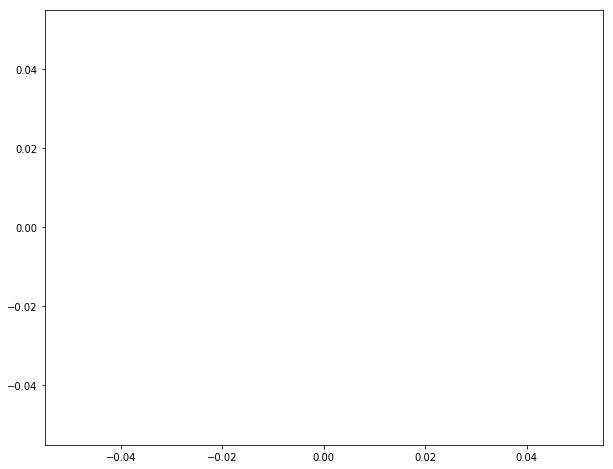

In [122]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, speech in enumerate(simple_data.index):
    x = data_clean[data_clean.Talk_ID == index].polarity
    y = data_clean[data_clean.Talk_ID == index].subjectivity
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, simple_data[index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [42]:
# Split each routine into 10 parts
def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [124]:
# Let's take a look at our data again
data_clean[data_clean.Talk_ID == 2113]

,Talk_ID,public_url,headline,description,event,duration,published,tags,views,text,...,speaker_4,speaker4_occupation,speaker4_introduction,speaker4_profile,speech_length,reached_threshold,prefers,tag,polarity,subjectivity
9399,2113,https://www.ted.com/talks/fred_swaniker_the_le...,"The leaders who ruined Africa, and the generat...","Before he hit eighteen, Fred Swaniker had live...",TEDGlobal 2014,0:13:26,10/21/14,"TED Fellows,Africa,entrepreneur",1277831,ruin generation fix ted hit eighteen live gamb...,...,NaN,NaN,NaN,NaN,11591,1,0,TED Fellows,0.194441,0.475613


In [43]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data_clean.text:
    split = split_text(t)
    list_pieces.append(split)


In [44]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data_clean.text:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces[:5]

[['avert climate crisis alternative humor humanity exude inconvenient truth al gore spell ways address climate change immediately buy hybrid invent new hotter brand name global warm thank much truly great honor opportunity come stage twice extremely grateful blow away conference want thank many nice comment say night say sincerely partly mock sob need laughter put position laughter fly air force two eight laughter take shoe boot get airplane laughter applause tell one quick story illustrate like laughter true story every bite true soon tipper leave mock sob white house laught',
  'er drive home little farm east drive laughter know sound like little thing laughter look mirror sudden hit motorcade back laughter hear phantom limb pain laughter rent ford laughter dinnertime start look place eat get exit get exit find restaurant family restaurant chain know go sit booth waitress come make big commotion tipper laughter take order go couple booth next us lower voice much really strain hear sa

In [45]:
# The list has 1591 elements, one for each transcript
len(list_pieces)

1591

In [46]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [47]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

# Calculate the polarity for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.2963131313131313,
  0.1375,
  0.08750000000000001,
  0.13251748251748252,
  0.08598484848484848,
  0.143859649122807,
  0.167979797979798,
  -0.045833333333333344,
  0.11985930735930733,
  0.255],
 [0.0513949013949014,
  0.059488428238428225,
  0.033958944281524926,
  -0.023307359307359304,
  0.11095238095238094,
  0.08305335968379446,
  0.0308982683982684,
  0.006944444444444445,
  0.044049873737373735,
  0.022312409812409822],
 [0.1854341736694678,
  0.08749999999999998,
  -0.10178571428571428,
  0.07977272727272726,
  0.1290633608815427,
  0.15308123249299724,
  0.2399122807017544,
  0.19646464646464645,
  0.15432539682539684,
  0.20660688517831374],
 [0.06680672268907563,
  0.05181277056277056,
  0.050157418339236495,
  -0.02840909090909092,
  0.1984217171717171,
  0.16553030303030306,
  0.13921568627450984,
  -0.09444444444444443,
  0.15382775119617223,
  0.24235209235209232],
 [0.1869047619047619,
  0.2751908179539758,
  -0.03923442499529456,
  0.07946996419218642,
  0.068452

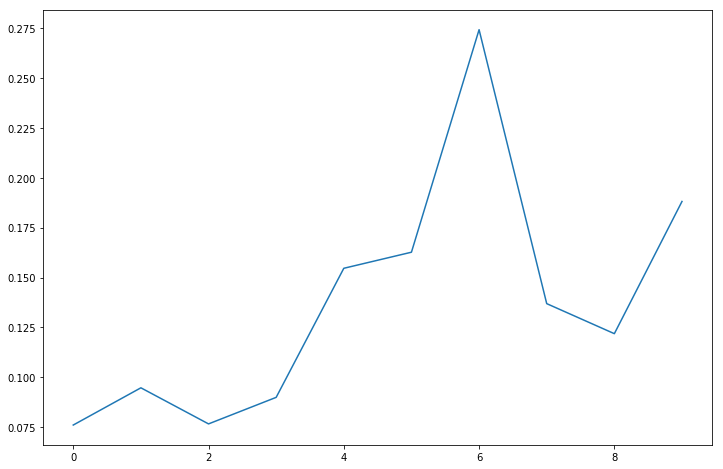

In [48]:
# Show the plot for one speech
plt.plot(polarity_transcript[1590])
#plt.title(data[1])
plt.show()

In [ ]:
simple_data.head()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


ValueError: num must be 1 <= num <= 12, not 13

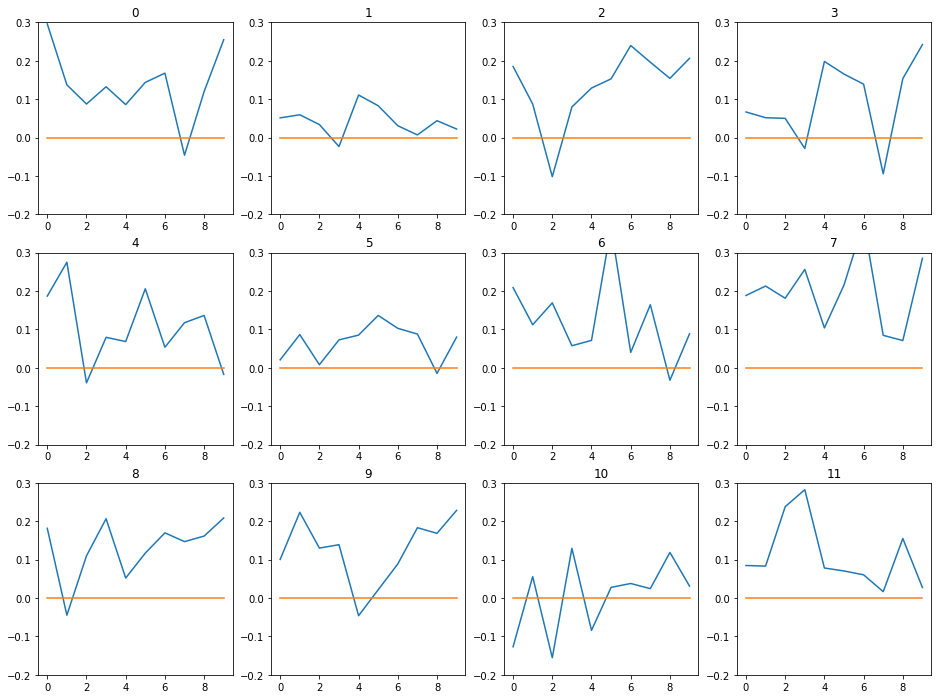

In [131]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, speech in enumerate(simple_data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(index)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [132]:
data_clean.to_pickle('data_clean.pkl')

### LDA

#### Topic Modeling - Attempt #1

In [ ]:
data = data_dtm

In [ ]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
type(cv.vocabulary_)

In [ ]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))

# for unwanted_key in add_stop_words:
#     if unwanted_key in cv.vocabulary_:
#         del cv.vocabulary_[unwanted_key] # JAY STYLE
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [ ]:
len(id2word)

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

In [ ]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

In [ ]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

#### Topic Modeling - Attempt #2 (Nouns Only)

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [194]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,Talk_ID,public_url,headline,description,event,duration,published,tags,views,text,...,speaker_4,speaker4_occupation,speaker4_introduction,speaker4_profile,speech_length,reached_threshold,prefers,tag,polarity,subjectivity
0,1,https://www.ted.com/talks/al_gore_on_averting_...,Averting the climate crisis,With the same humor and humanity he exuded in ...,TED2006,0:16:17,6/27/06,"alternative energy,cars,global issues,climate ...",3266733,avert climate crisis alternative humor humanit...,...,NaN,NaN,NaN,NaN,12074,1,1,alternative energy,0.142703,0.451107
9,53,https://www.ted.com/talks/majora_carter_s_tale...,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",TED2006,0:18:36,6/27/06,"MacArthur grant,cities,green,activism,politics...",2000421,green ghetto emotionally charge talk activist ...,...,NaN,NaN,NaN,NaN,18477,1,1,MacArthur grant,0.040806,0.417995
18,66,https://www.ted.com/talks/ken_robinson_says_sc...,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,TED2006,0:19:24,6/27/06,"children,teaching,creativity,parenting,culture...",51614087,school kill creativity sir ken make entertain ...,...,NaN,NaN,NaN,NaN,17801,1,0,children,0.132291,0.471794
25,92,https://www.ted.com/talks/hans_rosling_shows_t...,The best stats you've ever seen,You've never seen data presented like this. Wi...,TED2006,0:19:50,6/27/06,"demo,Asia,global issues,visualizations,global ...",12662135,best ever see never see data present like dram...,...,NaN,NaN,NaN,NaN,17561,1,1,demo,0.098429,0.462222
36,96,https://www.ted.com/talks/tony_robbins_asks_wh...,Why we do what we do,"Tony Robbins discusses the ""invisible forces"" ...",TED2006,0:21:45,6/27/06,"entertainment,goal-setting,potential,psycholog...",22368699,tony discuss invisible force motivate action a...,...,NaN,NaN,NaN,NaN,23666,1,0,entertainment,0.103277,0.495314
44,49,https://www.ted.com/talks/joshua_prince_ramus_...,Behind the design of Seattle's library,Architect Joshua Prince-Ramus takes the audien...,TED2006,0:19:58,7/10/06,"library,architecture,design,culture,collaboration",1042335,behind design library architect take audience ...,...,NaN,NaN,NaN,NaN,18794,0,0,library,0.066519,0.387698
49,71,https://www.ted.com/talks/rick_warren_on_a_lif...,A life of purpose,"Pastor Rick Warren, author of ""The Purpose-Dri...",TED2006,0:21:02,7/18/06,"Christianity,philanthropy,religion,God,happine...",3361934,life purpose pastor rick warren author life re...,...,NaN,NaN,NaN,NaN,18097,1,1,Christianity,0.135496,0.439532
57,94,https://www.ted.com/talks/dan_dennett_s_respon...,Let's teach religion -- all religion -- in sch...,Philosopher Dan Dennett calls for religion -- ...,TED2006,0:24:45,7/18/06,"atheism,consciousness,evolution,philosophy,rel...",2751013,let us teach religion religion school philosop...,...,NaN,NaN,NaN,NaN,20267,1,0,atheism,0.205399,0.527502
65,54,https://www.ted.com/talks/cameron_sinclair_on_...,My wish: A call for open-source architecture,"Accepting his 2006 TED Prize, Cameron Sinclair...",TED2006,0:23:34,7/25/06,"disaster relief,open-source,philanthropy,globa...",1248115,wish call architecture disaster accept ted pri...,...,NaN,NaN,NaN,NaN,20434,0,1,disaster relief,0.130867,0.433216
75,55,https://www.ted.com/talks/jehane_noujaim_inspi...,My wish: A global day of film,Jehane Noujaim unveils her 2006 TED Prize wish...,TED2006,0:25:38,7/25/06,"TED Prize,peace,entertainment,movies,global is...",409921,wish global day film ted change unveil ted pri...,...,NaN,NaN,NaN,NaN,21513,0,1,TED Prize,0.119225,0.478806


In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.text.apply(nouns))
data_nouns

In [ ]:
# Create a new document-term matrix using only nouns
# from sklearn.feature_extraction import text
# from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

In [ ]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

In [ ]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

#### Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.text.apply(nouns_adj))
data_nouns_adj

In [ ]:
# Re-add the additional stop words since we are recreating the document-term matrix
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.75)
data_cvna = cvna.fit_transform(data_nouns_adj.text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=7, id2word=id2wordna, passes=10)
ldana.print_topics()

In [ ]:
import pyLDAvis.gensim
viz_data = pyLDAvis.prepare(ldana)
#pyLDAvis.gensim.prepare(ldana, corpusna, id2wordna)

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

In [ ]:
# Let's try _ topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

In [ ]:
# Let's try _ topics
ldana = models.LdaModel(corpus=corpusna, num_topics=8, id2word=id2wordna, passes=10)
ldana.print_topics()

In [ ]:
# from Hamilton's slack (LDA visuals)
ldamodel = ldana
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [30, 30]

for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

#### Identify Topics in Each Document

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

In [ ]:
data.columns

In [ ]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [ ]:
data_clean.head(20)

In [ ]:
data_clean.reset_index(inplace=True)

In [ ]:
data_clean.columns

In [ ]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [21, 300]

# Create subplots for 300 speeches
for speech_num in list(range(0,300)):
    wc.generate(data_clean.text[speech_num])
    
    plt.subplot(100, 3, speech_num+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(speech_num)
    
plt.show()

In [ ]:
data_clean.text[113]

In [ ]:
pd.set_option('max_colwidth',800)
data_clean.iloc[111:114]

In [ ]:
pd.reset_option('max_colwidth')
df.iloc[112:115]

In [ ]:
df.text.iloc[113]

In [ ]:
df.iloc[50:60]

In [ ]:
# Read in cleaned data
dtm_stop = pd.read_pickle('dtm_stop.pkl')
dtm_stop.head()

#### Trying simple Text Classifier

In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
#from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')
data_clean.head()

In [ ]:
simple_data = data_clean[['Talk_ID','text', 'reached_threshold']]
simple_data = simple_data.sample(frac=1).reset_index(drop=True)  # shuffle
print(simple_data.shape)
simple_data.head()

In [ ]:
simple_data.set_index('Talk_ID', inplace=True)
print(simple_data.shape)
simple_data.head()

In [ ]:
simple_data.text

In [ ]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(stop_words=stop_words)
# data_cv = cv.fit_transform(data_clean.text)

# data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_stop.index = data_clean.index

# Pickle it for later use
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

In [ ]:
vocabulary = list(dtm_stop.columns)

In [ ]:
count_vectorizer = CountVectorizer(stop_words=stop_words, vocabulary=vocabulary)

In [ ]:
counts = cv.fit_transform(simple_data['text'].values)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
targets = simple_data['reached_threshold'].values
classifier.fit(counts, targets)

In [ ]:
examples = ['part of the journey', 'keep mindful of present moment']
example_counts = count_vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

#### Let's Try Again

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
sentences = simple_data['text'].values
y = simple_data['reached_threshold'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

In [ ]:
# pd.set_option('max_colwidth',2000)
# pd.reset_option('max_colwidth')
data_clean.reset_index(inplace=True, drop=True)
data_clean.head()

In [ ]:
data_clean.columns

In [ ]:
data_clean.drop(['index'], axis=1, inplace=True)
data_clean.head()

In [ ]:
pd.set_option('max_colwidth',1000)
data_clean.text.head(1)

In [ ]:
# Let's pickle it for later use
data_clean.to_pickle("latecomer_fj.pkl")

#### Cosine Similarity

In [ ]:
def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    # from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return cosine

In [ ]:
ss1 = 'The president greets the press in Chicago'
ss2 = 'Obama speaks to the media in Illinois'

In [ ]:
cosine_distance_countvectorizer_method(ss1 , ss2)

O-Reilly Example https://www.oreilly.com/learning/how-do-i-compare-document-similarity-using-python

### Gensim Similarity Model

In [5]:
# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')
data_clean.columns

Index(['Talk_ID', 'public_url', 'headline', 'description', 'event', 'duration',
       'published', 'tags', 'views', 'text', 'speaker_1',
       'speaker1_occupation', 'speaker1_introduction', 'speaker1_profile',
       'speaker_2', 'speaker2_occupation', 'speaker2_introduction',
       'speaker2_profile', 'speaker_3', 'speaker3_occupation',
       'speaker3_introduction', 'speaker3_profile', 'speaker_4',
       'speaker4_occupation', 'speaker4_introduction', 'speaker4_profile',
       'speech_length', 'reached_threshold', 'prefers', 'tag', 'polarity',
       'subjectivity'],
      dtype='object')

In [12]:
pd.set_option('max_colwidth',1000)
pd.DataFrame(data_clean.iloc[2])

,18
Talk_ID,66
public_url,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity
headline,Do schools kill creativity?
description,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.
event,TED2006
duration,0:19:24
published,6/27/06
tags,"children,teaching,creativity,parenting,culture,dance,education"
views,51614087
text,school kill creativity sir ken make entertain profoundly move case create education system nurture rather undermine creativity good morning laughter great blow away whole thing fact leave laughter three theme run conference relevant want talk one extraordinary evidence human creativity people variety range second put us place idea go happen term future idea may play interest education actually find everybody interest education find interest dinner party say work education actually often dinner party frankly laughter work education ask laughter never ask back curiously strange say somebody know say say work education see blood run face like oh god know laughter one night week laughter ask education pin wall one go deep people right like religion money big interest education think huge vest interest partly education mean take us future grasp think start school year retire nobody clue despite parade past four days world look like five time yet mean educate think extraordinary third pa...


In [10]:
data_clean.reset_index(inplace=True, drop=True)
data_clean.head()

,Talk_ID,public_url,headline,description,event,duration,published,tags,views,text,...,speaker_4,speaker4_occupation,speaker4_introduction,speaker4_profile,speech_length,reached_threshold,prefers,tag,polarity,subjectivity
0,1,https://www.ted.com/talks/al_gore_on_averting_...,Averting the climate crisis,With the same humor and humanity he exuded in ...,TED2006,0:16:17,6/27/06,"alternative energy,cars,global issues,climate ...",3266733,avert climate crisis alternative humor humanit...,...,NaN,NaN,NaN,NaN,12074,1,1,alternative energy,0.142703,0.451107
1,53,https://www.ted.com/talks/majora_carter_s_tale...,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",TED2006,0:18:36,6/27/06,"MacArthur grant,cities,green,activism,politics...",2000421,green ghetto emotionally charge talk activist ...,...,NaN,NaN,NaN,NaN,18477,1,1,MacArthur grant,0.040806,0.417995
2,66,https://www.ted.com/talks/ken_robinson_says_sc...,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,TED2006,0:19:24,6/27/06,"children,teaching,creativity,parenting,culture...",51614087,school kill creativity sir ken make entertain ...,...,NaN,NaN,NaN,NaN,17801,1,0,children,0.132291,0.471794
3,92,https://www.ted.com/talks/hans_rosling_shows_t...,The best stats you've ever seen,You've never seen data presented like this. Wi...,TED2006,0:19:50,6/27/06,"demo,Asia,global issues,visualizations,global ...",12662135,best ever see never see data present like dram...,...,NaN,NaN,NaN,NaN,17561,1,1,demo,0.098429,0.462222
4,96,https://www.ted.com/talks/tony_robbins_asks_wh...,Why we do what we do,"Tony Robbins discusses the ""invisible forces"" ...",TED2006,0:21:45,6/27/06,"entertainment,goal-setting,potential,psycholog...",22368699,tony discuss invisible force motivate action a...,...,NaN,NaN,NaN,NaN,23666,1,0,entertainment,0.103277,0.495314


In [11]:
data_clean.describe()

,Talk_ID,views,speech_length,reached_threshold,prefers,polarity,subjectivity
count,1591.000000,1.591000e+03,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000
mean,1716.795097,1.940542e+06,11652.783784,0.488372,0.522313,0.111029,0.462312
std,1743.680986,2.936802e+06,5271.789839,0.500022,0.499659,0.054656,0.053589
min,1.000000,1.914690e+05,1576.000000,0.000000,0.000000,-0.151242,0.277121
25%,640.500000,8.792555e+05,7567.000000,0.000000,0.000000,0.076105,0.427775
50%,1510.000000,1.239901e+06,11834.000000,0.000000,1.000000,0.108790,0.462784
75%,2255.500000,1.910758e+06,15344.500000,1.000000,1.000000,0.145490,0.495536
max,13062.000000,5.161409e+07,35091.000000,1.000000,1.000000,0.431162,0.688613


In [12]:
length = len(data_clean)
length

1591

In [13]:
simple_data = data_clean[['public_url', 'headline', 'description', 'event', 'duration', 'published',
                         'speaker_1','speaker1_occupation', 'speaker1_introduction', 'speaker1_profile',
                         'speech_length', 'reached_threshold', 'prefers', 'polarity','subjectivity',
                          'text']]
# simple_data = simple_data.sample(frac=1).reset_index(drop=True)  # shuffle
simple_data.iloc[0]

public_url               https://www.ted.com/talks/al_gore_on_averting_...
headline                                       Averting the climate crisis
description              With the same humor and humanity he exuded in ...
event                                                              TED2006
duration                                                           0:16:17
published                                                          6/27/06
speaker_1                                                          Al Gore
speaker1_occupation                                       Climate advocate
speaker1_introduction    Nobel Laureate Al Gore focused the world’s att...
speaker1_profile         Why you should listen\nFormer Vice President A...
speech_length                                                        12074
reached_threshold                                                        1
prefers                                                                  1
polarity                 

In [16]:
def search_function(text_list, choice, search_words):
    length = len(text_list)
    text_list = [text_list.iloc[i] for i in range(length)]

    def nltk_tokenize(text):
        return [w.lower() for w in word_tokenize(text)]

    gen_docs = []
    for i in range(length):
        gen_docs.append(nltk_tokenize(text_list[i]))
    dictionary = gensim.corpora.Dictionary(gen_docs)

    corpus = []
    for i in range(length):
        corpus.append(dictionary.doc2bow(gen_docs[i]))
    tf_idf = gensim.models.TfidfModel(corpus)
#    print(tf_idf) # remove later
    sims = gensim.similarities.Similarity('Archives/',tf_idf[corpus],
                                      num_features=len(dictionary))
#    print(sims) # remove later
    # TRY OUT QUERIES
    query_doc = [w.lower() for w in word_tokenize(search_words)]
#    print(query_doc)  # remove later
    query_doc_bow = dictionary.doc2bow(query_doc)
#    print(query_doc_bow) # remove later
    query_doc_tf_idf = tf_idf[query_doc_bow]
#    print(query_doc_tf_idf) # remove later
    ans = sims[query_doc_tf_idf]
    ind = np.argmax(ans)
    print('INDEX = ', ind)
    return ind

In [17]:
def preprocess(data):
    
    lemmatized = [lemmadata(speech) for speech in data]
    
    tfidf = pickle.load(open("tfidf.pkl", "rb"))
    
    transformed = tfidf.transform(lemmatized)
    tfidf_df = pd.DataFrame(transformed.toarray(), columns=tfidf.get_feature_names())
    
    relevant = pickle.load(open("relevantwords.pkl", "rb"))
    
    testset = [tfidf_df[word] for word in relevant if word in tfidf_df.columns]
    
    return pd.DataFrame(testset).transpose()

In [18]:
def classifier(simple_data, search_words):
    #simple_data = simple_data.sample(frac=1).reset_index(drop=True) #shuffle
    x = simple_data['text']
    y = simple_data['prefers']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    def lemmadata(doc):
        pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
        raw_tokens = nltk.regexp_tokenize(doc, pattern)
        tokens = [i.lower() for i in raw_tokens]
        stop_words = set(stopwords.words('english'))
        listed = [w for w in tokens if not w in stop_words]
        lemmatized = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in listed]
        lemmatized = list(filter(lambda w: w != 'lb', lemmatized))
        words = list(filter(lambda w: w in english, lemmatized))
        return " ".join(words)
    lemmatized = [lemmadata(t) for t in x_train]
    tfidf = TfidfVectorizer()
    response = tfidf.fit_transform(lemmatized)
    tfidf_df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names())
    
    relevant = []
    for word in tfidf_df.columns:
        if tfidf_df[word].mean() > 0.0001:
            relevant.append(tfidf_df[word])
    relevant_df = pd.DataFrame(relevant).transpose()
    pickle.dump(tfidf, open("tfidf.pkl", "wb"))
    pickle.dump(relevant_df.columns, open("relevantwords.pkl", "wb"))
    
    mnb = MultinomialNB()
    mnb.fit(relevant_df, y_train)
    def classify_text(text):
        listtext = [text]
        processed = preprocess(listtext)
        return mnb.predict(processed)
#    test = preprocess(x_test)
#    mnb_pred = mnb.predict(test)
    return classify_text(search_words)
#     listtext = [search_words]
#     processed = preprocess(listtext)
#     return mnb.predict(processed)

Enter
1 for TEDTalks Search
2 for TEDTalks Classifier: 1
Enter
1 to Search by Description
2 to Search by Speech Transcript: 1
INDEX =  0
                                                                       0
public_url             https://www.ted.com/talks/al_gore_on_averting_...
headline                                     Averting the climate crisis
description            With the same humor and humanity he exuded in ...
event                                                            TED2006
duration                                                         0:16:17
published                                                        6/27/06
speaker_1                                                        Al Gore
speaker1_occupation                                     Climate advocate
speaker1_introduction  Nobel Laureate Al Gore focused the world’s att...
speaker1_profile       Why you should listen\nFormer Vice President A...
speech_length                                               

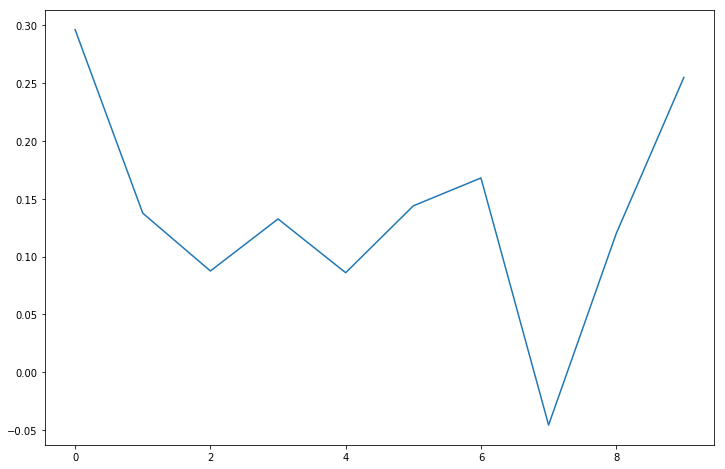

In [55]:
num = '' 
num2 = ''
plt.rcParams['figure.figsize'] = [12, 8]

while num != '1' and num != '2':
    num = input('Enter\n1 for TEDTalks Search\n2 for TEDTalks Classifier: ')
    if num == '1':
        while num2 != '1' and num2 != '2':
            num2 = input('Enter\n1 to Search by Description\n2 to Search by Speech Transcript: ')
            if num2 == '1':
                choice = 'description'
            elif num2 == '2':
                choice = 'text'
            #search_words = input('Enter Search Term(s): ')
            search_words = sample_descr0 # test queries
            idx = search_function(simple_data[choice], choice, search_words)
            print(pd.DataFrame(simple_data.iloc[idx].T))
            driver = webdriver.Chrome()
            driver.get(simple_data['public_url'].iloc[idx])
#            print(simple_data['public_url'].iloc[idx])
            # play = driver.find_element_by_xpath('//*[@id="ted-player"]/div[3]/button/div/div/div')
            # play.click()
            # Show the plot for one speech
            plt.plot(polarity_transcript[idx])
            #plt.title(simple_data.headline[ind])
            plt.show()
    elif num == '2':
        search_words = input('Enter Search Term(s): ')
        result = classifier(simple_data, search_words)
        if result == [1]:
            print("One of Jay's favorite topics!")
        else:
            print("Not one of Jay's favorite topics")

In [56]:
driver.quit()

In [142]:
df = simple_data.text

In [158]:
print(len(gen_docs), gen_docs[0])

1591 ['avert', 'climate', 'crisis', 'alternative', 'humor', 'humanity', 'exude', 'inconvenient', 'truth', 'al', 'gore', 'spell', 'ways', 'address', 'climate', 'change', 'immediately', 'buy', 'hybrid', 'invent', 'new', 'hotter', 'brand', 'name', 'global', 'warm', 'thank', 'much', 'truly', 'great', 'honor', 'opportunity', 'come', 'stage', 'twice', 'extremely', 'grateful', 'blow', 'away', 'conference', 'want', 'thank', 'many', 'nice', 'comment', 'say', 'night', 'say', 'sincerely', 'partly', 'mock', 'sob', 'need', 'laughter', 'put', 'position', 'laughter', 'fly', 'air', 'force', 'two', 'eight', 'laughter', 'take', 'shoe', 'boot', 'get', 'airplane', 'laughter', 'applause', 'tell', 'one', 'quick', 'story', 'illustrate', 'like', 'laughter', 'true', 'story', 'every', 'bite', 'true', 'soon', 'tipper', 'leave', 'mock', 'sob', 'white', 'house', 'laughter', 'drive', 'home', 'little', 'farm', 'east', 'drive', 'laughter', 'know', 'sound', 'like', 'little', 'thing', 'laughter', 'look', 'mirror', 'sud

In [160]:
len(dictionary)

20501

In [ ]:
# def dtb(text):
#     return dictionary.doc2bow(text)
# corpus = list(list(df.text.apply(dtb)))

In [162]:
corpus[:2]

[[(0, 1),
  (1, 1),
  (2, 3),
  (3, 2),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 5),
  (12, 3),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 6),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 5),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 4),
  (38, 2),
  (39, 2),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 2),
  (48, 3),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 5),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 7),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 3),
  (67, 1),
  (68, 1),
  (69, 7),
  (70, 3),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 9),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 1),
  (90, 2),
  (91, 1)

In [165]:
# TRY OUT QUERIES
query_doc = [w.lower() for w in word_tokenize(sample_text0)]
print(query_doc)  # remove later
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow) # remove later
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf) # remove later

['avert', 'climate', 'crisis', 'alternative', 'humor', 'humanity', 'exude', 'inconvenient', 'truth', 'al', 'gore', 'spell', 'ways', 'address', 'climate', 'change', 'immediately', 'buy', 'hybrid', 'invent', 'new', 'hotter', 'brand', 'name', 'global', 'warm', 'thank', 'much', 'truly', 'great', 'honor', 'opportunity', 'come', 'stage', 'twice', 'extremely', 'grateful', 'blow', 'away', 'conference', 'want', 'thank', 'many', 'nice', 'comment', 'say', 'night', 'say', 'sincerely', 'partly', 'mock', 'sob', 'need', 'laughter', 'put', 'position', 'laughter', 'fly', 'air', 'force', 'two', 'eight', 'laughter', 'take', 'shoe', 'boot', 'get', 'airplane', 'laughter', 'applause', 'tell', 'one', 'quick', 'story', 'illustrate', 'like', 'laughter', 'true', 'story', 'every', 'bite', 'true', 'soon', 'tipper', 'leave', 'mock', 'sob', 'white', 'house', 'laughter', 'drive', 'home', 'little', 'farm', 'east', 'drive', 'laughter', 'know', 'sound', 'like', 'little', 'thing', 'laughter', 'look', 'mirror', 'sudden',

In [166]:
ans = sims[query_doc_tf_idf]
ind = np.argmax(ans)
print(ind)

1591
0


,0
public_url,https://www.ted.com/talks/al_gore_on_averting_...
headline,Averting the climate crisis
description,With the same humor and humanity he exuded in ...
event,TED2006
duration,0:16:17
published,6/27/06
speaker_1,Al Gore
speaker1_occupation,Climate advocate
speaker1_introduction,Nobel Laureate Al Gore focused the world’s att...
speaker1_profile,Why you should listen\nFormer Vice President A...


In [168]:
# pd.set_option('max_colwidth',1200)
pd.reset_option('max_colwidth')
data_clean[data_clean.Talk_ID == 1568]  # index 8737

,Talk_ID,public_url,headline,description,event,duration,published,tags,views,text,...,speaker_4,speaker4_occupation,speaker4_introduction,speaker4_profile,speech_length,reached_threshold,prefers,tag,polarity,subjectivity
1219,1568,https://www.ted.com/talks/ellen_jorgensen_bioh...,"Biohacking -- you can do it, too",We have personal computing -- why not personal...,TEDGlobal 2012,0:10:08,1/15/13,"synthetic biology,crowdsourcing,code,molecular...",1207891,synthetic personal compute personal question b...,...,NaN,NaN,NaN,NaN,8184,0,1,synthetic biology,0.138704,0.420964


# Test Cases

In [152]:
sample_text0 = simple_data.text.iloc[0]
print(sample_text0)

avert climate crisis alternative humor humanity exude inconvenient truth al gore spell ways address climate change immediately buy hybrid invent new hotter brand name global warm thank much truly great honor opportunity come stage twice extremely grateful blow away conference want thank many nice comment say night say sincerely partly mock sob need laughter put position laughter fly air force two eight laughter take shoe boot get airplane laughter applause tell one quick story illustrate like laughter true story every bite true soon tipper leave mock sob white house laughter drive home little farm east drive laughter know sound like little thing laughter look mirror sudden hit motorcade back laughter hear phantom limb pain laughter rent ford laughter dinnertime start look place eat get exit get exit find restaurant family restaurant chain know go sit booth waitress come make big commotion tipper laughter take order go couple booth next us lower voice much really strain hear say say yes

In [153]:
sample_text1 = simple_data.text.iloc[1]
print(sample_text1)

green ghetto emotionally charge talk activist carter detail fight environmental justice south show minority suffer flaw urban policy today happy hear sustainable development save us however ted often tell real policy agenda feasible especially large urban like new york city people power public private sector really feel though danger reason today part dog abandon puppy find back rain back turn much bigger dog would anticipate come life fight huge waste facility plan east river waterfront despite fact small part new york city already handle percent entire commercial waste sewage treatment plant sewage sludge plant four power plant center well bring diesel truck trip area week area also one park people city contact park department initiative help develop waterfront project think really bite naive would live area life could get river lovely mention jog dog one morning pull think another illegal dump weed pile garbage stuff mention keep drag lo behold end lot river know forget little aband

In [154]:
sample_text1590 = simple_data.text.iloc[1590]
print(sample_text1590)

role faith belief modern change advice believe god religious advise use god responsibility happen live nonreligious ask keep open mind work especially issue like health care education much potential realize walk across divide faith hand hand try solve many say bear two amaze religious fact father regular response question go church go pray go play tennis case wonder faith find university come house invite us school draw sense personal conviction life service opt baptism faith birthday present faith shape work social entrepreneur attempt address press challenge last work train youth promote ethics across later school teacher faith challenge young ask series question ask god hate quickly retort course god love equally ask many young die stumble mumble respond many reason young die cannot blame god ask let happen could stop say yes could yes could send us change light world salt earth fail mix affair organize religion positive negative educate political elite like build many first school 

In [14]:
sample_descr0 = data_clean.description[0]
sample_descr0

'With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.'